## Big Query Costs - Basic Carbitrage Processing

In [3]:
from google.cloud import bigquery
from google.api_core.exceptions import GoogleAPIError
import os

client = bigquery.Client(project="umt-msba")



In [2]:
# # Function to estimate query cost
# def estimate_query_cost(query):
#     try:
#         #dry_run=True: This configures the query to simulate execution without processing any data. 
#         # It returns metadata about the query, such as how much data it would scan.

#         #use_query_cache=False: This ensures the query doesn't use any cached results,
#         #meaning it will provide an accurate estimate of how much data would be processed.
#         job_config = bigquery.QueryJobConfig(dry_run=True, use_query_cache=False)
#         query_job = client.query(query, job_config=job_config)
#         bytes_processed = query_job.total_bytes_processed
#         cost = (bytes_processed / (1024 ** 4)) * 5  # Cost is $5 per TB
#         return bytes_processed, cost
#     except GoogleAPIError as e:
#         print(f"Error estimating query cost: {e}")
#         return None, None


In [7]:
# Function to run a query
def run_query(query):
    try:
        query_job = client.query(query)
        results = query_job.result()

        bytes_processed = query_job.total_bytes_processed
        mb_processed = bytes_processed / (1024 ** 2)
        cost_per_tb = 5.0


        tb_processed = bytes_processed / (1024 ** 4)  # Convert bytes to terabytes
        estimated_cost = tb_processed * cost_per_tb

        # Display the processed data and estimated cost
        print(f"Data processed: {mb_processed:.2f} MB")
        

        print(f"Estimated bytes processed: {bytes_processed}")
        print(f"Estimated cost: ${estimated_cost:.10f}\n\n")

        print(f"Estimated bytes processed against a full year of data: {bytes_processed*50}")
        print(f"Estimated cost against a full year of data: ${estimated_cost*50:.20f}")
        print(f"Estimated cost against a full year of data every 6 hours: ${(estimated_cost*50)*(4*365):.20f}\n\n---------------")

        

        return results
    except GoogleAPIError as e:
        print(f"Error running query: {e}")
        return None

In [ ]:
# Main logic - Template

# query = """
# SELECT name, SUM(number) as total
# FROM `bigquery-public-data.usa_names.usa_1910_2013`
# WHERE state = 'TX'
# GROUP BY name
# ORDER BY total DESC
# LIMIT 10
# """

# Estimate query cost
# bytes_processed, cost = estimate_query_cost(query)
# if bytes_processed and cost:
#     print(f"Estimated bytes processed: {bytes_processed}")
#     print(f"Estimated cost: ${cost:.2f}")

# # Run the query and display results
# results = run_query(query)
# if results:
#     for row in results:
#         print(f"name: {row.name}, total: {row.total}")


Co-pilot and ChatGPT were used to help make this code.

ChatGPT Prompt:

https://chatgpt.com/share/66e9d0b2-7888-8000-9fd8-b5d3883cb5ea

## Queries

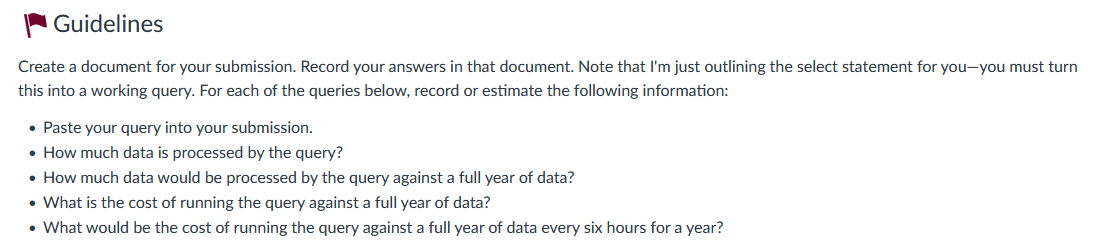

The data is from the dates 9-6-2024 to 9-13-2024; this is roughly 2% of a year.

### Query 1: 'SELECT COUNT(*)'

In [12]:


count_table_query = """
SELECT COUNT(*) as total
FROM `umt-msba.carbitrage.raw_listing_pages_50K_20240913`
"""



# Run the query and display results
results = run_query(count_table_query)
if results:
    for row in results:
        print(f" Total Count: {row.total}")


Data processed: 0.00 MB
Estimated bytes processed: 0
Estimated cost: $0.00000


Estimated bytes processed against a full year of data: 0
Estimated cost against a full year of data: $0.00000000000000000000
Estimated cost against a full year of data every 6 hours: $0.00000000000000000000
 Total Count: 50000


### Query 2: 'SELECT location, COUNT(*)'

In [5]:


count_location_query = """
SELECT location, COUNT(*) as record_count
FROM `umt-msba.carbitrage.raw_listing_pages_50K_20240913`
GROUP BY location;
"""



# Run the query and display results
results = run_query(count_location_query)
if results:
    for row in results:
        print(f" Location: {row.location}, Record Count: {row.record_count}")


Data processed: 0.47 MB
Estimated bytes processed: 491966
Estimated cost: $0.00000


Estimated bytes processed against a full year of data: 24598300
Estimated cost against a full year of data: $0.00011186011761310510
Estimated cost against a full year of data every 6 hours: $0.16331577171513345093
 Location: sfbay, Record Count: 3369
 Location: portland, Record Count: 1604
 Location: sandiego, Record Count: 1374
 Location: sacramento, Record Count: 1378
 Location: inlandempire, Record Count: 907
 Location: miami, Record Count: 880
 Location: newyork, Record Count: 983
 Location: denver, Record Count: 1157
 Location: dallas, Record Count: 1178
 Location: orangecounty, Record Count: 1199
 Location: phoenix, Record Count: 2170
 Location: seattle, Record Count: 1662
 Location: losangeles, Record Count: 2384
 Location: tucson, Record Count: 516
 Location: albuquerque, Record Count: 518
 Location: washingtondc, Record Count: 482
 Location: lasvegas, Record Count: 631
 Location: austin, Recor

### Query 3: 'SELECT url, location'

In [6]:


url_location_query = """
SELECT location, url
FROM `umt-msba.carbitrage.raw_listing_pages_50K_20240913`
"""



# Run the query and display results
results = run_query(url_location_query)
if results:
    for row in results:
        print(f" Location: {row.location}, URL: {row.url}")


Data processed: 4.72 MB
Estimated bytes processed: 4950580
Estimated cost: $0.00002


Estimated bytes processed against a full year of data: 247529000
Estimated cost against a full year of data: $0.00112563157017575577
Estimated cost against a full year of data every 6 hours: $1.64342209245660342276
 Location: sfbay, URL: https://sfbay.craigslist.org/eby/cto/d/pleasanton-2009-nissan-altima-25sl/7784440143.html
 Location: sfbay, URL: https://sfbay.craigslist.org/sby/cto/d/san-jose-2013-toyota-highlander-limited/7784434753.html
 Location: sfbay, URL: https://sfbay.craigslist.org/eby/cto/d/sunnyvale-toyota-camry-2007-new-hybrid/7784453015.html
 Location: sfbay, URL: https://sfbay.craigslist.org/pen/cto/d/mountain-view-2006-ford-f150-extended/7784441982.html
 Location: sfbay, URL: https://sfbay.craigslist.org/nby/cto/d/napa-2016-jeep-wrangler-rubicon/7784425313.html
 Location: sfbay, URL: https://sfbay.craigslist.org/sby/cto/d/sunnyvale-2007-lexus-rx-350-awd/7784410891.html
 Location: sfba

### Query 4: 'SELECT url, raw_html, location' from "missoula" 

In [ ]:

url_html_location_missoula_query = """
SELECT url, raw_html, location
FROM `umt-msba.carbitrage.raw_listing_pages_50K_20240913`
WHERE location = 'missoula'
"""



# Run the query and display results
results = run_query(url_html_location_missoula_query)
if results:
    for row in results:
        print(f"URL: {row.url} \nRawHTML: {row.raw_html} \nLocation: {row.location} \n--------------------")


Data processed: 1398.84 MB
Estimated bytes processed: 1466788486
Estimated cost: $0.0066701818


Estimated bytes processed against a full year of data: 73339424300
Estimated cost against a full year of data: $0.33350908915963373147
Estimated cost against a full year of data every 6 hours: $486.92327017306524794549

### Additional Questions




#### 1. What types of queries appear to be driving the costs?

Using the 'WHERE' operator increased the bytes processed from roughly 5 million (4.72 MB) to 1.5 billion (1398.84 MB). Although, I'm not certain how much impact the url is having on the price.

#### 2. How would you recommend structuring the project to keep costs down? 

To optimize project structure and reduce costs, I have two key recommendations: partitioning tables by day and extracting raw data for analysis rather than relying heavily on GBQ processing.

First, partitioning tables by day allows queries to target specific date ranges, ensuring that only relevant partitions are scanned. If storage space for the query results is available, it’s advisable to store the output and partition future queries based on time intervals, such as daily or every six hours; then, you can run analysis through Python without cost.

Additionally, I recommend minimizing the use of operators when working with large datasets. For instance, instead of applying a WHERE clause in the query, consider fetching all data in Python and filtering the results as they are processed, which can help optimize performance.